In [4]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
from quickclus import QuickClus

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("Mall_Customers.csv")

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
clf = QuickClus(n_components = 2)

In [10]:
clf.fit(df.drop("CustomerID", axis = 1))

In [11]:
results = clf.assing_results(df)

In [12]:
results.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


In [13]:
clf.cluster_summary(results)

,data_prop,data_count,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
-1,0.230,46,111.173913,34.913043,65.108696,51.500000
4,0.195,39,71.820513,37.076923,49.358974,44.487179
1,0.170,34,72.735294,37.441176,48.676471,41.882353
3,0.170,34,89.411765,45.558824,56.117647,45.647059
0,0.140,28,162.285714,32.321429,85.428571,81.428571
2,0.095,19,112.000000,52.157895,65.105263,35.789474


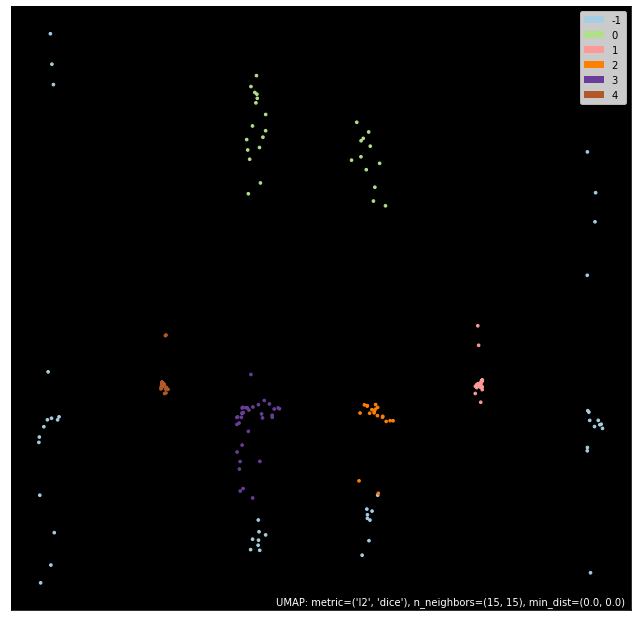

In [14]:
clf.plot_2d_labels()

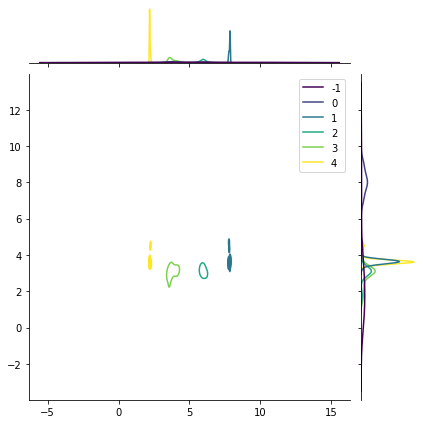

In [15]:
clf.plot_embedding_labels()

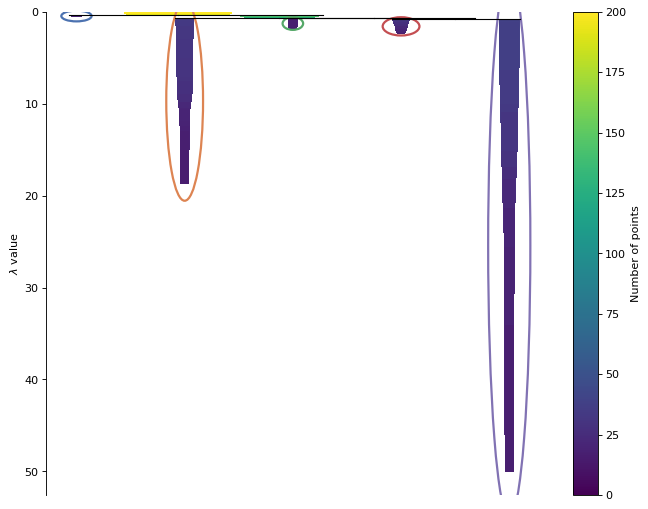

In [16]:
clf.plot_condensed_tree()

In [17]:
clf.tune_model()

[I 2022-03-30 21:02:11,979] A new study created in memory with name: no-name-e07c108e-f7e1-458d-93c8-193985eae910
[I 2022-03-30 21:02:12,078] Trial 0 finished with value: 0.28107603639554946 and parameters: {'min_cluster': 5, 'min_samples': 7}. Best is trial 0 with value: 0.28107603639554946.
[I 2022-03-30 21:02:12,126] Trial 1 finished with value: 0.3367804714192775 and parameters: {'min_cluster': 6, 'min_samples': 3}. Best is trial 1 with value: 0.3367804714192775.
[I 2022-03-30 21:02:12,158] Trial 2 finished with value: 0.0783781047028582 and parameters: {'min_cluster': 7, 'min_samples': 27}. Best is trial 1 with value: 0.3367804714192775.
[I 2022-03-30 21:02:12,186] Trial 3 finished with value: 0.3239276521665525 and parameters: {'min_cluster': 23, 'min_samples': 3}. Best is trial 1 with value: 0.3367804714192775.
[I 2022-03-30 21:02:12,229] Trial 4 finished with value: 0.32217931183841475 and parameters: {'min_cluster': 3, 'min_samples': 26}. Best is trial 1 with value: 0.33678047

Best parameters:  {'min_cluster': 10, 'min_samples': 5}


QuickClus(min_samples=15, n_components=2)

In [18]:
results = clf.assing_results(df)
clf.cluster_summary(results, metric = "mean")

,data_prop,data_count,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
6,0.210,42,93.500000,40.952381,57.642857,45.285714
5,0.195,39,71.820513,37.076923,49.358974,44.487179
4,0.170,34,72.735294,37.441176,48.676471,41.882353
8,0.085,17,111.117647,55.647059,64.823529,36.529412
1,0.080,16,159.625000,32.062500,83.500000,81.000000
0,0.060,12,165.833333,32.666667,88.000000,82.000000
7,0.050,10,99.800000,20.200000,60.400000,38.900000
3,0.050,10,97.300000,44.900000,59.900000,48.400000
-1,0.050,10,136.800000,30.500000,76.700000,74.400000
2,0.050,10,112.700000,52.400000,64.700000,46.100000


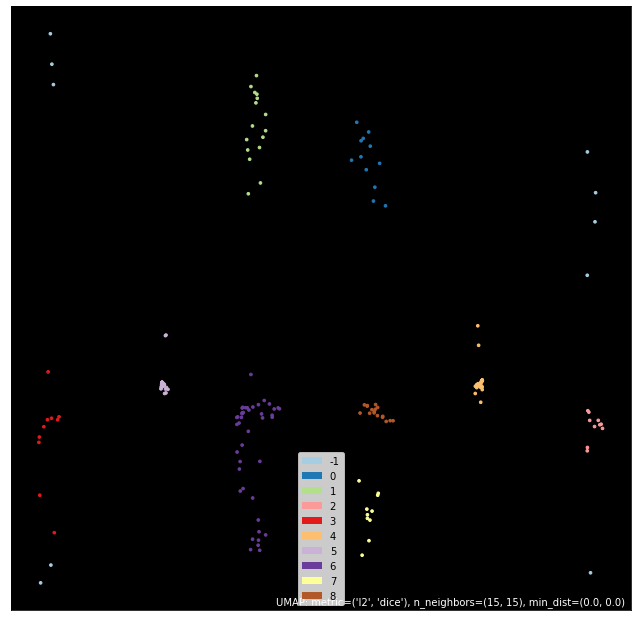

In [19]:
clf.plot_2d_labels()

In [20]:
import seaborn as sns
from matplotlib.pyplot import figure

<AxesSubplot:xlabel='Cluster', ylabel='Spending Score (1-100)'>

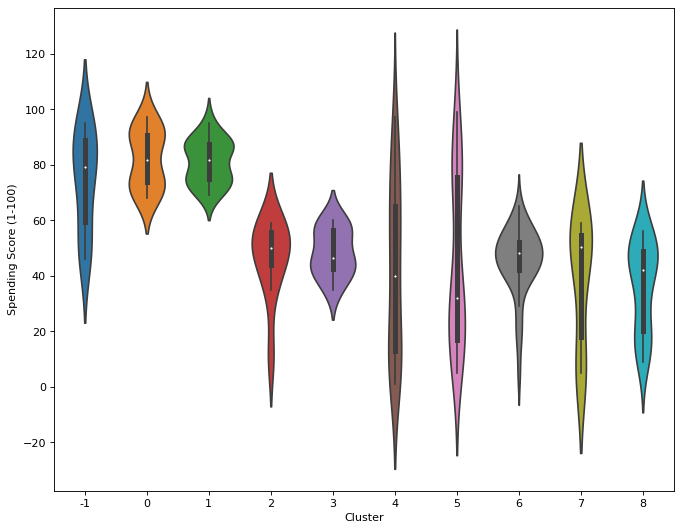

In [21]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Spending Score (1-100)", data = results)

<AxesSubplot:xlabel='Cluster', ylabel='Age'>

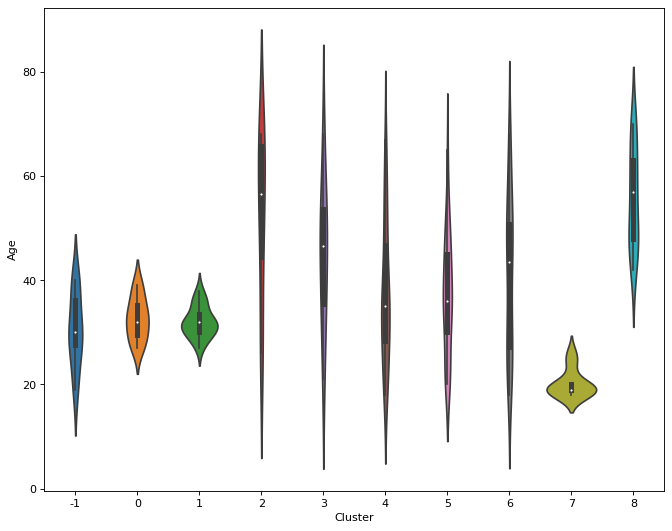

In [22]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Age", data = results)

<AxesSubplot:xlabel='Cluster', ylabel='Age'>

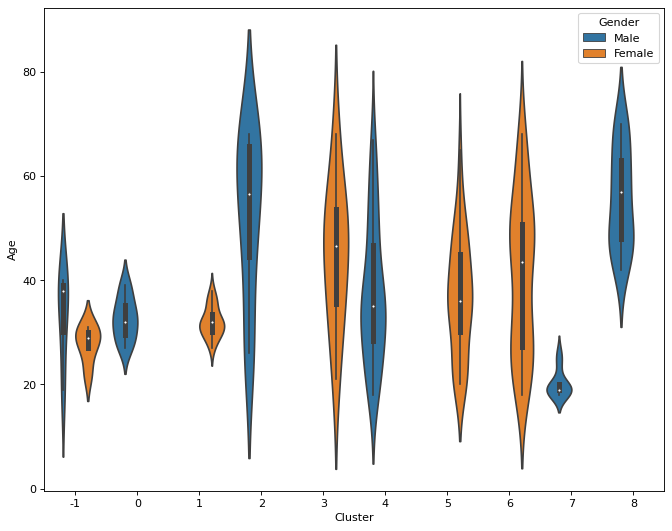

In [23]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Age", data = results, hue = "Gender")

<AxesSubplot:xlabel='Cluster', ylabel='Annual Income (k$)'>

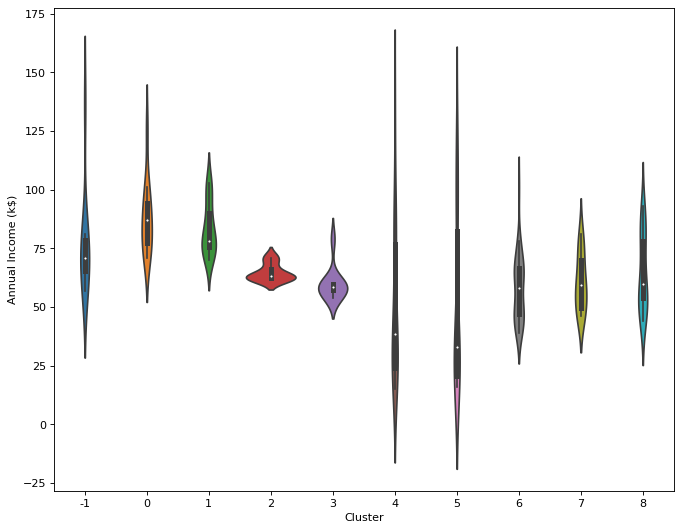

In [24]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Annual Income (k$)", data = results)

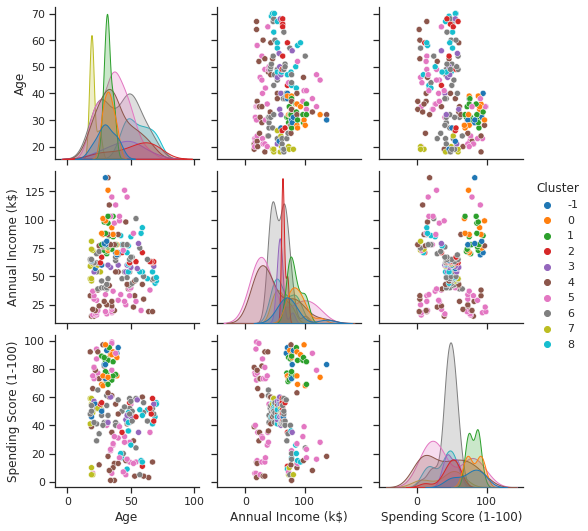

In [25]:
sns.set_theme(style="ticks")

sns.pairplot(results.drop("CustomerID", axis = 1), hue = "Cluster", palette = "tab10")